# Dijkstra's algorithm:

Reference: [Dijkstra's algorithm, Wikipedia, the free encyclopedia](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [3]:
%load_ext watermark

In [4]:
# Run this cell before close.
%watermark
%watermark --iversion
%watermark -b -r -g

2020-02-22T21:49:19+00:00

CPython 3.7.6
IPython 7.12.0

compiler   : GCC 8.3.0
system     : Linux
release    : 5.3.0-7625-generic
machine    : x86_64
processor  : 
CPU cores  : 8
interpreter: 64bit
networkx 2.4

Git hash: fe89d5d3dd6589ab092d14b08b28433b03ddd033
Git repo: https://github.com/ysraell/examples.git
Git branch: master


In [5]:
from random import randint
import string

# Only to show the graph:
import networkx as nx
import matplotlib.pyplot as plt

#### Simple class for (undirected) graphs:

In [15]:
class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = {}
        self.distances = {}

    def add_node(self, value):
        self.nodes.add(value)
        self.edges[value] = []
        
    def add_edge(self, from_node, to_node, distance):
        self.edges[from_node].append(to_node)
        self.edges[from_node] = list(set(self.edges[from_node]))
        self.edges[to_node].append(from_node)
        self.edges[to_node] = list(set(self.edges[to_node]))
        self.distances[tuple(sorted((from_node, to_node)))] = distance
    
    def distance(self, from_node, to_node):
        '''
            Considering only a undirected graph.
        '''
        try:
            return self.distances[tuple(sorted((from_node, to_node)))] if from_node != to_node else 0
        except:
            return float('inf')

    def path_distance(self,nodes):
        return sum([self.distance(nodes[i],nodes[i+1]) for i in range(0,len(nodes)-1)])
    

#### Dijkstra algorithm for computing all shortest path from start node:

In [16]:
def dijkstra(graph: Graph, node_start: str):
    dist = {node: float('Inf') for node in graph.nodes}
    dist[node_start] = 0
    pi = {}
    Q = list(graph.nodes)
    
    while Q:
        for current_node,_ in sorted(dist.items(), key=lambda x: x[1]):
            if current_node in Q:
                Q.remove(current_node)
                break
        for neighbor in G.edges[current_node]:
            if dist[neighbor] > dist[current_node]+G.distance(neighbor,current_node):
                dist[neighbor] = dist[current_node]+G.distance(neighbor,current_node)
                pi[neighbor] = current_node
    return pi, dist

#### For get a path for a given start and end nodes:

In [17]:
def dijkstra_shortest_path(graph: Graph, node_start: str, node_end: str):
    ver, dist = dijkstra(G,nodes[0])
    if dist[node_end] == float('Inf'):
        print('There is no way to the end node from start node.')
        return None
    shortest_path = [node_end]
    current_node = node_end
    while current_node != node_start:
        shortest_path.append(ver[current_node])
        current_node = ver[current_node]
    return shortest_path[::-1], dist[node_end]

#### Generating a well balanced graph (not with much edges).

In [18]:
?randint

Signature: randint(a, b)
Docstring:
Return random integer in range [a, b], including both end points.
        
File:      /usr/local/lib/python3.7/random.py
Type:      method


In [19]:
G = Graph()
Gnx = nx.Graph()
nodes = [c for c in string.ascii_uppercase][:10]
for node in nodes:
    G.add_node(node)
for nodefrom in nodes:
    for nodeto in nodes:
        if nodeto != nodefrom:
            n = randint(-400,100)
            if (n >0) and (tuple(sorted((nodefrom, nodeto))) not in G.distances.keys()):
                G.add_edge(nodefrom, nodeto, n)
                Gnx.add_edge(nodefrom, nodeto, distance=n)

{('A', 'E'): Text(0.9045085021450356, 0.29389264599008463, '71'),
 ('A', 'B'): Text(0.6545084894790487, 0.4755282923782967, '47'),
 ('A', 'H'): Text(0.34549145985700375, -0.47552820932863293, '34'),
 ('E', 'H'): Text(0.24999996200203933, -0.18163558996221912, '59'),
 ('E', 'J'): Text(0.8090169744877491, -3.178651286628309e-09, '4'),
 ('B', 'C'): Text(-2.0861625482648805e-08, 0.9510565283306005, '95'),
 ('B', 'I'): Text(-0.2500000335276124, 0.7694208819423884, '8'),
 ('C', 'D'): Text(-0.6545085013999776, 0.4755282188645867, '60'),
 ('C', 'F'): Text(-0.559016973742691, 0.1816355836049165, '24'),
 ('C', 'H'): Text(-0.3090170504836704, 2.6623670823511247e-08, '23'),
 ('C', 'I'): Text(-0.5590170333473352, 0.7694208521400663, '49'),
 ('I', 'H'): Text(-0.5590170631496574, -0.18163561976454123, '67'),
 ('I', 'G'): Text(-0.2499999590218071, -0.18163561976454123, '80'),
 ('I', 'J'): Text(-5.066394759278836e-08, -3.2980973396767865e-08, '44'),
 ('D', 'G'): Text(-0.34549142707444946, -0.4755282530

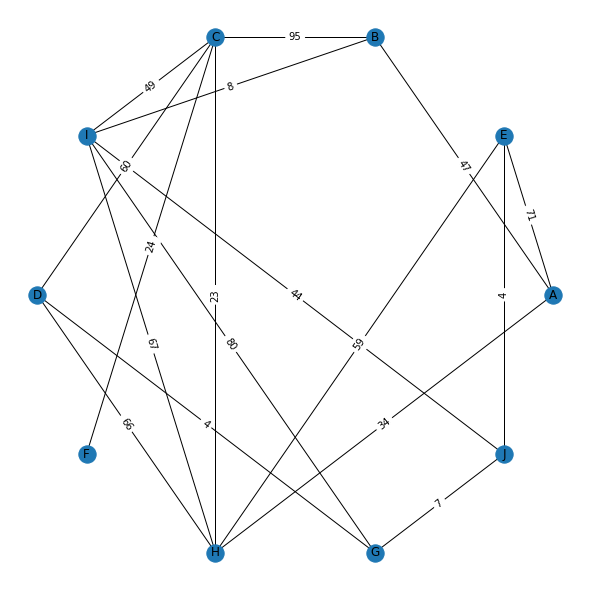

In [20]:
n = 8
plt.figure(figsize=(n,n))
pos = nx.circular_layout(Gnx)
labels = nx.get_edge_attributes(Gnx,'distance')
nx.draw(Gnx, pos, with_labels=True)
nx.draw_networkx_edge_labels(Gnx, pos, edge_labels=labels)

#### From A

In [21]:
ver, dist = dijkstra(G,'A')

In [22]:
dist

{'D': 86,
 'B': 47,
 'H': 34,
 'G': 82,
 'J': 75,
 'E': 71,
 'F': 81,
 'C': 57,
 'I': 55,
 'A': 0}

#### to 'E'

In [27]:
G.path_distance(['A','D'])

inf

In [26]:
dijkstra_shortest_path(G,'A','D')

(['A', 'E', 'J', 'G', 'D'], 86)

#### Using the NetworkX method:

In [28]:
print(nx.shortest_path(Gnx,source='A',target='D',weight='distance'))

['A', 'E', 'J', 'G', 'D']
